<a href="https://colab.research.google.com/github/Lucas-Melo-A-S/Data_Science/blob/main/Lucas_Melo_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto disponibilizado pela Sigmoidal, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e fintechs.

Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. De acordo com Serasa Experian no ano de 2021 o país teve cerca de 4,1 milhões de movimentações suspeitas de fraude.Esse número representa um aumento de 16,8% em relação ao ultimo ano mas ele acaba chamando atenção pois foi o maior desde que esse estudou iniciou.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira. Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente podendo gerar estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano. Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais.

## Conhecendo o Banco de Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O banco de dados representa operações financeiras que aconteçaram ao longo de dois dias. 


<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>


[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados componentes. Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

As features(colunas) são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança).

Nesse Banco de Dados foram encontrados duas situações que foram classificadas como **Fraude (1) e Não Fraude(0)**.E através dessas situações será realizado um estudo comparativo entre métodos de Machine Learning para a **classificação**.

Para iniciar todo o processo de limpeza, balanceamento e machine learning iremos importas todas as bibliotecas que serão importantes para o nosso projeto.

In [87]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- Para importar o Banco de Dados iremos utilizar o link para lermos o arquivo CSV.

- Após importar o banco de dados iremos utilizar o comando head para observarmos as 5 primeiras linhas do Banco de Dados.

In [88]:
url = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(url)

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Feito a exportação e observando que não será necessario a configuração do Banco de Dados, iremos iniciar a etapa da Analise Exploratoria, onde nesta iremos utilizar de comando para extrairmos irformações que poderão ser importante para todo processo que iremos realizar.

## Análise Exploratória



Como primeira etapa da Analise, iremos verificar a quantidade de linhas(features) e colunas(labels) que esse dataframe tem, também iremos verificar se nesse dataframe tem a presença de valores nulos

In [89]:
#Verificando quantas features e label tem o dataframe

df.shape
print(f'O dataframe tem {df.shape[0]} features')
print(f'O dataframe tem {df.shape[1]} labels')

O dataframe tem 284807 features
O dataframe tem 31 labels


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [91]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Após a verificação constatamos que não se tem valor nulo, algo muito bom pois não iremos precisar remover ou dar valor a nenhuma linhas ou coluna do Banco de Dados.

In [92]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


Nessa situação acima, foi feito apenas uma formtação em toda a estrutura do Bando de Dados, onde todos os valores float tiveram suas casas decimais reduzidas em apenas duas. Foi utilizado ess tecnica apenas para melhor observação dos dados, já que não deixamos a tela tão poluída.

Como o label 'Class' será aquele que iremos utilizar para a tecnicas de Machine Learning, se faz necessario verificar como está o balanceamento dos dados, pois esse desbalanceamento pode alienar nossa aprendizado para apenas um lado.

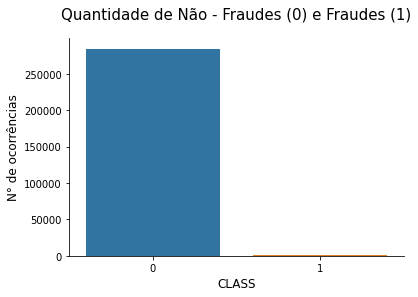

In [93]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(6,4))

sns.countplot(x = df.Class, data = df)

ax.set_title('Quantidade de Não - Fraudes (0) e Fraudes (1)',
            fontsize = 15,
            color = 'black',
            loc = 'center',
            pad = 20)

ax.set_xlabel('CLASS', fontsize = 12)
ax.set_ylabel('N° de ocorrências', fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Nessa situação podemos verificar um desbalanceamento da quantidade de valor 0(sem fraude) com a quantidade de valores 1(Fraudes) do Banco de Dados com isso temos que balancear ou normalizar essa diferença para que os dados possam ser medidos de maneira que não tenha uma convergencia para um dos dois lado. Ou seja, vamos pegar aleatoriamente apenas alguns valores que o resultado é 0 para equiapararmos com os valores com resultado 1, esse balanceamento deve ser feito antes do teste do dataframe.


In [131]:
df.Amount.shape

(284807,)

In [140]:
print(f'No banco de dados é quantidade de não fraudes que ocorreram foi de  {df.Amount[df.Class == 0].shape[0]} vezes\n')
print(f'No banco de dados é quantidade de fraudes que ocorreram foi de {df.Amount[df.Class == 1].shape[0]} vezes\n')

print(f'Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas {((df.Amount[df.Class == 1].shape[0])/(df.Amount.shape[0])*100):.2f}% do total.')

No banco de dados é quantidade de não fraudes que ocorreram foi de  284315 vezes

No banco de dados é quantidade de fraudes que ocorreram foi de 492 vezes

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0.17% do total.


In [95]:
print('Transações Não-fraudelentas')
print(df.Amount[df.Class == 0].describe())
print('\nTransações Fraudulentas')
print(df.Amount[df.Class == 1].describe())

Transações Não-fraudelentas
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Transações Fraudulentas
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Com a analise do Banco de Dados também foi constatador que duas colunas(labels) estavama com valores bem desbalanceados, como o caso da coluna 'Time' que todas as transações estavam em segudos,l fazendo que o Banco de Dados seja muito sensivel para esse tipo de label. O label 'Amount' também é um outro exemplo, já que os valores estavam com uma variação muito alta.

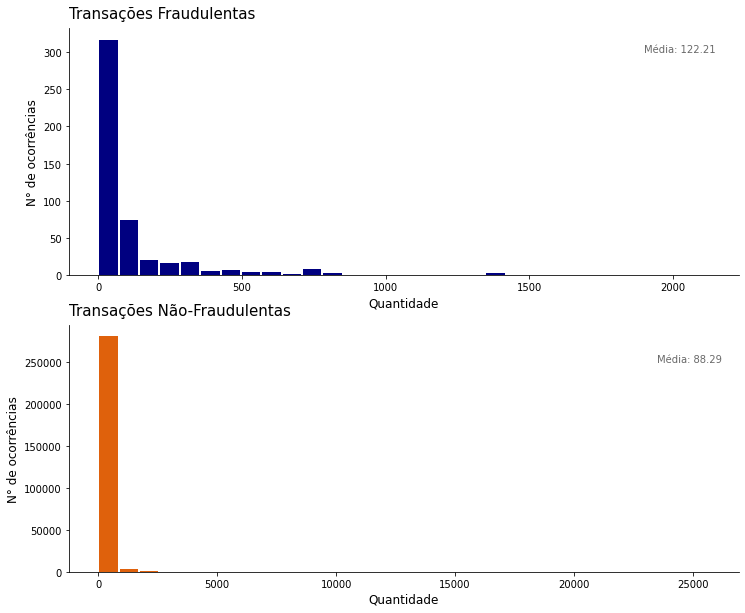

In [96]:
fig, ax = plt.subplots(nrows=2, ncols = 1, figsize=(12,10))

ax[0].hist(df.Amount[df.Class == 1], bins = 30, color= '#000080', rwidth= 0.9)

ax[0].text(1900,300,f'Média: {df.Amount[df.Class == 1].mean():.2f}', color = '#696969')

ax[0].set_title('Transações Fraudulentas',
            fontsize = 15,
            color = 'black',
            loc = 'left',
            pad = 10)

ax[0].set_xlabel('Quantidade', fontsize = 12)
ax[0].set_ylabel('N° de ocorrências', fontsize = 12)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


#HISTOGRAMA Não Fraude
ax[1].hist(df.Amount[df.Class == 0], bins = 30, color= '#DF610C', rwidth= 0.9)

ax[1].text(23500,250000,f'Média: {df.Amount[df.Class == 0].mean():.2f}', color = '#696969')

ax[1].set_title('Transações Não-Fraudulentas',
            fontsize = 15,
            color = 'black',
            loc = 'left',
            pad = 10)

ax[1].set_xlabel('Quantidade', fontsize = 12)
ax[1].set_ylabel('N° de ocorrências', fontsize = 12)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# print(df.Amount[df.Class == 0].value_counts())

# sns.histplot(df.Amount[df.Class == 0], bins = 100)
# plt.xlim(0,1750)


Outra situação bem peculiar com o label 'Amount' é que ao utilizar o comando describe conseguimos verificar que tem uma variação muito grande entre os valores de 75% e 100%. De primeira somos levados a pensar que os valores são outliner e devemos fazer a correção desses valores, mas é nesse tipo de problema que devemos utilizar nossa interpretação mais afundo, pois não podemos levar em consideração que os valores são outliner pois estamos falando de transações, e esse vai depender exclusivamente do seu tipo de cliente, podendo ser grandes ou pequenas transações.



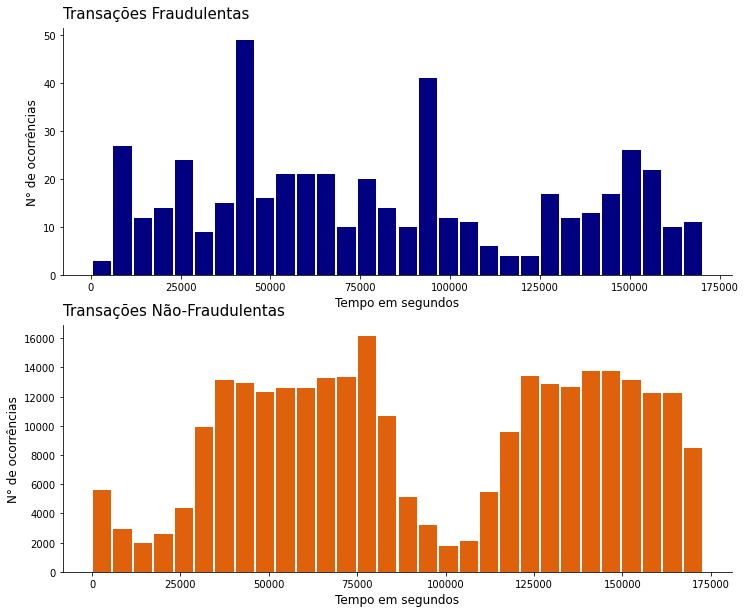

In [97]:
fig, ax = plt.subplots(nrows=2, ncols = 1, figsize=(12,10))

ax[0].hist(df.Time[df.Class == 1], bins = 30, color= '#000080', rwidth= 0.9)

ax[0].set_title('Transações Fraudulentas',
            fontsize = 15,
            color = 'black',
            loc = 'left',
            pad = 10)

ax[0].set_xlabel('Tempo em segundos', fontsize = 12)
ax[0].set_ylabel('N° de ocorrências', fontsize = 12)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


#HISTOGRAMA Não Fraude
ax[1].hist(df.Time[df.Class == 0], bins = 30, color= '#DF610C', rwidth= 0.9)

ax[1].set_title('Transações Não-Fraudulentas',
            fontsize = 15,
            color = 'black',
            loc = 'left',
            pad = 10)

ax[1].set_xlabel('Tempo em segundos', fontsize = 12)
ax[1].set_ylabel('N° de ocorrências', fontsize = 12)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

Após toda essa Analise do Banco de Dados, podemos observar que alguns dados precisão ser tratados para que o Machine Learning possa fluir da melhor maneira.

# Preparação dos Dados



##Normalizando Dados (Time e Amount)

Essa grande variação de valores nos labels 'Time' e 'Amount' pode ser algo prejudicial já que os algoritmos de Machine Learning não funcionam tão bem quando os atributos numéricos de entrada tem escalas muito diferentes, com isso se faz necessario aplicar o 'Escalonamento das Caracteristicas'.

Existem duas maneiras comuns dos atributos obterem a mesma escala:
* Escala Min-Max: Normalmente chamado de normalização, onde o valor é deslocado e redimensionados para que acabem variando de 0 a 1.(Para chegar ao resultado  substraimos o valor minimo e dividimos pelo máximo menos o minimo). O sklearn tem um transformador que já faz essa função que é o MinMaxScaler.

* Padronização: Para chegar no resultado da padronização, se faz necessario a subtração pelo valor médio e em seguida divide pela variancia, de modo que a distribuição resultante tenha variância unitária.
obs:Ao contrario da normalização, a padronização não está vinculado a resultados fixos (0 e 1), sendo em alguns casos até prejudicial aos algoritmo de Machine Learning , mas está é muito menos afetada por OUTLINERS - StandardScale

Nessa situação foi preterido a utilização do StandartScale

OBS:

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

###Time

In [99]:
print(df['Time'])

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64


In [100]:
scaler.fit(df[['Time']])
df['Time'] = scaler.transform(df[['Time']])

In [101]:
print(df.Time)

0        -1.996583
1        -1.996583
2        -1.996562
3        -1.996562
4        -1.996541
            ...   
284802    1.641931
284803    1.641952
284804    1.641974
284805    1.641974
284806    1.642058
Name: Time, Length: 284807, dtype: float64


###Amount

In [102]:
print(df.Amount.sort_values())

15816         0.00
77470         0.00
190885        0.00
87335         0.00
174481        0.00
            ...   
54018     11898.09
46841     12910.93
151296    18910.00
58465     19656.53
274771    25691.16
Name: Amount, Length: 284807, dtype: float64


In [103]:
scaler.fit(df[['Amount']])
df['Amount'] = scaler.transform(df[['Amount']],)

In [104]:
print(df.Amount.sort_values())

15816      -0.353229
77470      -0.353229
190885     -0.353229
87335      -0.353229
174481     -0.353229
             ...    
54018      47.216360
46841      51.265782
151296     75.250581
58465      78.235272
274771    102.362243
Name: Amount, Length: 284807, dtype: float64


## Divisão de modelo de teste com modelo de treino

Para evitar qualquer tipo de problema(Data Snooping bias) quando for realizado o aprendizado, devemos separar a parte do Banco de Dados que será utilizada para Teste e para Treino.

- Data Snooping bias:Quando estimamos o erro de generalização usando um conjunto de testes, fazendo com que nossa estimativa fique otimista demais fazendo que tenha uma produção um sistema que não terá o desempenho esperado

In [105]:
from sklearn.model_selection import train_test_split

X = df.drop('Class',axis=1)
y = df.Class

X_train_raw,X_test,y_train_raw,y_test= train_test_split(X, y,test_size = 0.2, random_state=42)



##Balanceando Dados

In [106]:
print(pd.Series(y_train_raw).value_counts())

0    227451
1       394
Name: Class, dtype: int64


Como já tinha sido observado anteriomente, o dados de 'Class' estão muito desiguais onde 227451 desses dados são 'não fraudes' e apenas 394 são 'fraudes', essa grande diferença pode fazer com que a maquina seja tedencionada a apenas os valores de não fraude, por isos se faz necessario o balanceamento dos dados, para que os valores de treinamento possam ser iguais fazendo com que o sistema possa aprender de melhor maneira.

Para esse balancemaento sera utilizado o comando RandomUnderSampler, onde pegará uma quantidade aleatoria de dados igualando com os outros valores da classe.

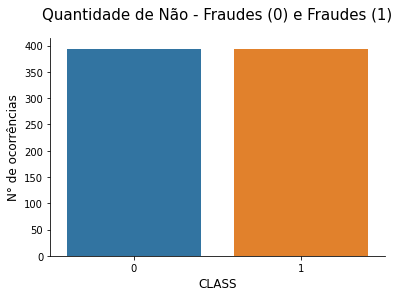

In [107]:
#Balanceando dados
from imblearn.under_sampling import RandomUnderSampler

ru = RandomUnderSampler(random_state = 42)
X_train,y_train = ru.fit_resample(X_train_raw,y_train_raw)


fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(6,4))

sns.countplot(x = y_train, data = df)

ax.set_title('Quantidade de Não - Fraudes (0) e Fraudes (1)',
            fontsize = 15,
            color = 'black',
            loc = 'center',
            pad = 20)

ax.set_xlabel('CLASS', fontsize = 12)
ax.set_ylabel('N° de ocorrências', fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [108]:
print(f'No total temos: \n{pd.Series(y_train).value_counts()}')

No total temos: 
0    394
1    394
Name: Class, dtype: int64


# Modelo de Machine Learning


Todos os processos anteriores foram feitos para que ao chegar nessa etapa do processo nenhum tipo de erro apareça e aumente assim a veracidade do aprendizado da maquina.

Para essa situação, iremos analisar diversos tipos de modelos de Machine Learning para que fizemos uma comparação e analise entre todos esses modelos para verificar qual o mais indicado para utilizar para esse sistema.


In [109]:
from sklearn.metrics import classification_report,accuracy_score

##SVM

A maquina de vetores de suportes(SVM) é um modelo robusto e versatil de aprendizado de maquina, capaz de fazer classificações lineares ou não lineares, de regressão e até mesmo de detecção de outlier. É um dos modelos mais populares, muito utilizadas para banco de dados pequenos ou médios.

In [110]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [111]:
svc_pred = svc.predict(X_test)

svc_accuracy = (accuracy_score(y_test,svc_pred) * 100)
print('Relatório de Classificação:\n ', classification_report(y_test,svc_pred, digits = 2))
print(f'{svc_accuracy:.2f}%')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.89      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

98.29%


##Logistic Regression

A regressão Logistica é um modelo comumente usada para estimar a probabilidade de uma intancia de permanecer a uma classe especifica, esse modelo como a Regressão Linear se utiliza das dados passados para prever os proximos dados que virão.

In [112]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [113]:
y_pred = classifier.predict(X_test)

lr_accuracy = accuracy_score(y_test,y_pred) * 100
print('Relatório de Classificação:\n ', classification_report(y_test,y_pred, digits = 2))
print(f'{lr_accuracy :.2f}')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962

96.35


##Decision Tree

A árvore de decisões é também um odelo muito versatil, este modelo pode executar tanto tarefas de classificação como tarefas multioutput. Esse modelo se utiliza de algoritmos poderosos que são capazes de se adaptar aos Bancos de Dados mais complexos.

In [114]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10,
                              criterion = 'entropy',
                              random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [115]:
tree_pred = tree.predict(X_test)

tree_accuracy = accuracy_score(y_test,tree_pred) * 100
print('Relatório de Classificação:\n ', classification_report(y_test,tree_pred, digits = 2))
print(f'{tree_accuracy:.2f}%')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.89      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.90      0.49     56962
weighted avg       1.00      0.91      0.95     56962

90.72%


##Forest Decision

A floresta de Decisões é um agrupamento de árvores de decisão

In [116]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = 10,
                              criterion = 'entropy',
                              random_state = 42)

forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [117]:
forest_pred = forest.predict(X_test)

forest_accuracy = accuracy_score(y_test,forest_pred) * 100
print('Relatório de Classificação:\n ', classification_report(y_test,forest_pred, digits = 2))
print(f'{forest_accuracy :.2f}%')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.94      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.56     56962
weighted avg       1.00      0.98      0.99     56962

97.89%


##K-Neighbor

O algoritmo KNN (K Nearest Neighbor/Vizinho mais próximo) é um dos algoritmos mais utilizados em Machine Learning e também um dos mais simplistas. O método também pode ser utilizado tanto para classificação quanto para regressão em ambos os casos o algoritmo irá analisar diversas features (Colunas com dados, as quais geraram informação).

In [118]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors= 5)

neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [119]:
neigh_pred = neigh.predict(X_test)

neigh_accuracy = accuracy_score(y_test,neigh_pred) * 100
clf_report = classification_report(y_test,neigh_pred, digits = 2,output_dict=True)
print('Relatório de Classificação:\n ', classification_report(y_test,neigh_pred, digits = 2))
print(f'{neigh_accuracy:.2f} %')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.90      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962

97.37 %


 # Avaliar o desempenho do modelo

Após todo o processo de aprendizagem de maquina, diversas nformações são geradas e será com essas informações que poderemos avaliar o melhor desempenho de todos esses métodos.

##Avaliando as Métricas do Modelo

###Acurácia

A acurácia é considerada uma das métricas mais importantes e simples, nela se faz possivel avaliar o percentual de acertos.

In [120]:
accuracy_list = {'Support Vector Machines' : svc_accuracy,
                 'Regressão Logistica' : lr_accuracy,
                 'Arvore de Decisões' : tree_accuracy,
                 'Floresta de Decisões' : forest_accuracy,
                 'K-Vizinhos': neigh_accuracy}     

In [121]:
#Avaliando as métricas 

print(f'A accuracia do Support Vector Machines é {svc_accuracy:.2f} %')
print(f'A accuracia do Regressão Logistica é {lr_accuracy:.2f} %')
print(f'A accuracia do Arvore de Decisões é {tree_accuracy:.2f} %')
print(f'A accuracia do Floresta de Decisões é {forest_accuracy:.2f} %')
print(f'A accuracia do K-Vizinhos é {neigh_accuracy:.2f} %')

A accuracia do Support Vector Machines é 98.29 %
A accuracia do Regressão Logistica é 96.35 %
A accuracia do Arvore de Decisões é 90.72 %
A accuracia do Floresta de Decisões é 97.89 %
A accuracia do K-Vizinhos é 97.37 %


In [122]:
print(f'O método com a maior accuracia é {max(accuracy_list)} com o valor de {accuracy_list[max(accuracy_list, key=accuracy_list.get)]:.2f}%.')

O método com a maior accuracia é Support Vector Machines com o valor de 98.29%.


###Classification Report

In [123]:
print('Relatório de Classificação SVM:\n ', classification_report(y_test,svc_pred, digits = 2),'\n')
print('Relatório de Classificação Logistic Regression:\n ', classification_report(y_test,y_pred, digits = 2),'\n')
print('Relatório de Classificação Decision Tree:\n ', classification_report(y_test,tree_pred, digits = 2),'\n')
print('Relatório de Classificação Forest Decision:\n ', classification_report(y_test,forest_pred, digits = 2),'\n')
print('Relatório de Classificação K-Neighbor:\n ', classification_report(y_test,neigh_pred, digits = 2),'\n')

Relatório de Classificação SVM:
                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.89      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962
 

Relatório de Classificação Logistic Regression:
                precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962
 

Relatório de Classificação Decision Tree:
                precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.89      0.03        98

    accuracy                           0.91     56

Com o relatorio de confusão além de termo a acuracia, podemos observar outras métricas que podemos utilizadas para a comparação de métodos de Machine Learning como:

- **Sensibilidade/Recall:** Essa métrica avalia a capacidade do método de detectar com sucesso resultados classificados como positivos.

- **Especificidade:** Essa métrica avalia a capacidade do método de detectar resultados negativos.

- **Precisão:** Essa métrica que avalia a quantidade de verdadeiros positivos sobre a soma de todos os valores positivos.

- **F1-score:** É uma média harmônica calculada com base na precisão e na revocação.

###HeatMap

Já com o HeatMap é possivel observar atravês do grafico com foi o comportamento do método em relação a aquele Banco de Dados, com esse gráfico nos podemos observar a quantidade ou a porcentagem de Verdadeiro Positivo, Verdadeiro Negativo, Falso Positivo e Falso Negativo.

In [124]:
y_test.count()

56962

Text(0.5, 15.0, 'Previsto')

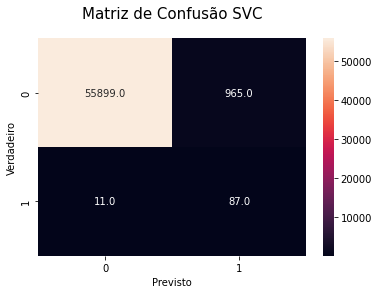

In [125]:
#SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test,svc_pred), annot=True, ax=ax,fmt='.1f')

ax.set_title("Matriz de Confusão SVC",
             pad = 20,
             fontsize = 15,
             color = 'black')
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

Text(0.5, 15.0, 'Previsto')

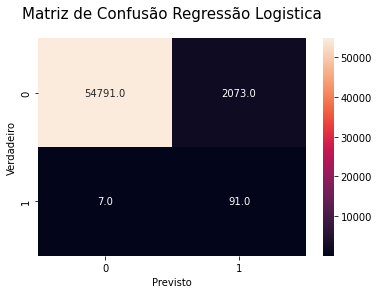

In [126]:
#Regressão Logistica

from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax=ax,fmt='.1f')

ax.set_title("Matriz de Confusão Regressão Logistica",
             pad = 20,
             fontsize = 15,
             color = 'black')
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

Text(0.5, 15.0, 'Previsto')

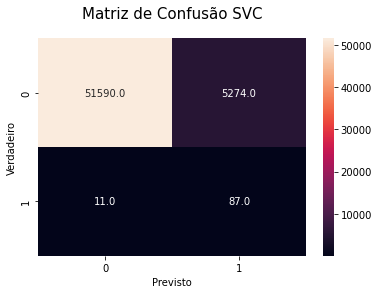

In [127]:
#Decison Tree


fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test,tree_pred), annot=True, ax=ax,fmt='.1f')

ax.set_title("Matriz de Confusão SVC",
             pad = 20,
             fontsize = 15,
             color = 'black')
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

Text(0.5, 15.0, 'Previsto')

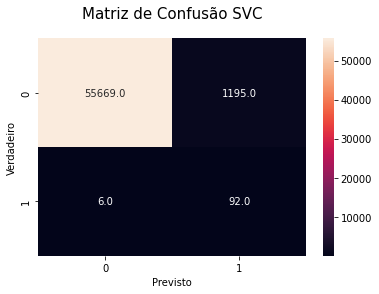

In [128]:
#Forest Decision

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test,forest_pred), annot=True, ax=ax,fmt='.1f')

ax.set_title("Matriz de Confusão SVC",
             pad = 20,
             fontsize = 15,
             color = 'black')
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

Text(0.5, 15.0, 'Previsto')

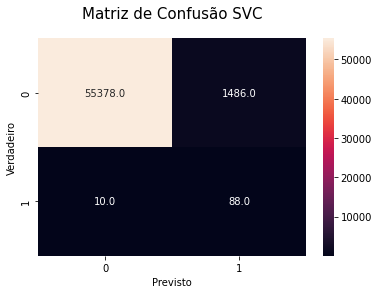

In [129]:
#K-Vizinhos


fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test,neigh_pred), annot=True, ax=ax,fmt='.1f')

ax.set_title("Matriz de Confusão SVC",
             pad = 20,
             fontsize = 15,
             color = 'black')
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

## Conclusão



Avaliando as precisão(precision), a sensibilidade(recall),a acuracia(accuracy) e a matriz de confussão podemos chegar a conclusão que o melhor modelo para esse sistema de detectações de fraudes é o SVM (Support Vector Machine).


Verificando as métricas podemos verificar que a sua precisão, recall e f1-score se destaca em relação aos outros, fazendo que chegamos a conclusão que o melhor método para essa situação é o SVM.